<a href="https://colab.research.google.com/github/vendkura/wine_quality/blob/main/vin_qualite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP2
---



In [3]:
import pandas as p
import os
import numpy as n
import matplotlib.pyplot as m#import math as m
import scipy.stats as st
import seaborn as sn

In [4]:
data = './dataset.csv'

vin = p.read_csv(data)
vin

,type de vin,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Vin-rouge,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Vin-rouge,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Vin-rouge,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Vin-rouge,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Vin-rouge,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Vin-blanc,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3
543,Vin-blanc,6.3,0.33,0.27,1.2,0.046,34.0,175.0,0.9934,3.37,0.54,9.4,6
544,Vin-blanc,8.3,0.39,0.70,10.6,0.045,33.0,169.0,0.9976,3.09,0.57,9.4,5
545,Vin-blanc,7.2,0.19,0.46,3.8,0.041,82.0,187.0,0.9932,3.19,0.60,11.2,7


# New Section

In [5]:
# CHOIX DE LA VARIABLE
# Nous avons choisi la qualite du vin
quality = vin['quality']
quality

0      5
1      5
2      5
3      6
4      5
      ..
542    3
543    6
544    5
545    7
546    6
Name: quality, Length: 547, dtype: int64

In [6]:
# VALEUR MINIMUM DE LA QUALITE
quality.min()

3

In [7]:
# VALEUR MAXIMUM DE LA QUALITE
quality.max()

8

In [8]:
# CALCUL DE LA MOYENNE DE LA QUALITE
quality.mean()

5.552102376599635

In [9]:
# CALCUL DU MEDIANE
quality.median()

5.0

In [10]:
# CALCUL DE L'EQUART TYPE
quality.std()

0.8400081569756036

In [11]:
# CALCUL DE LA VARIANCE
quality.var()

0.7056137037855502

In [12]:
# CALCUL A 2 VARIABLES

# CORRELATION
co = vin.corr()
cor = co['quality'][:-1]

<ipython-input-12-d83a810dc3be>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = vin.corr()


In [13]:
cor.min()

-0.36661793469750703

In [14]:
cor.max()

0.38107171918171406

In [15]:
# De ce constat, nous deduisons que la variable 'alcohol' influence le plus sur la qualite du vin avec un coefficient de 0,38 qui est le plus eleve
corel = quality.corr(vin['alcohol'])
corel

0.38107171918171445

Text(0.5, 1.0, "Relation entre la quantite d'alcool et la qualité de vin")

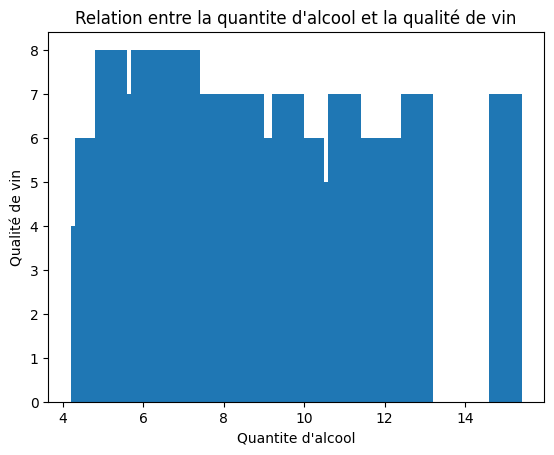

In [16]:
# GRAPHIQUE REPRESENTATIF DE LA QUALITE DU VIN ET LA QUANTITE D'ALCOOL
gr = m.bar(vin['fixed acidity'],quality)

m.xlabel('Quantite d\'alcool')
m.ylabel('Qualité de vin')
m.title('Relation entre la quantite d\'alcool et la qualité de vin')

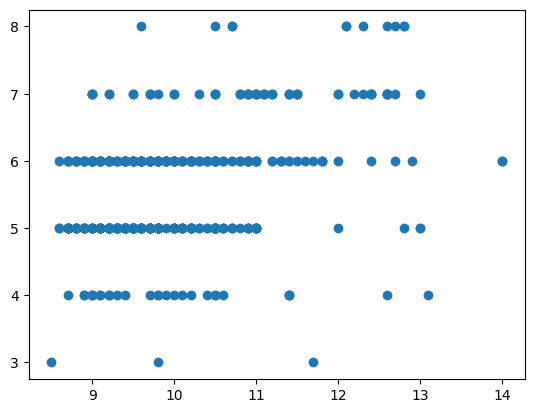

In [17]:
gr = m.scatter(vin['alcohol'],quality)

In [18]:
t_stat, p_value = st.ttest_ind(vin['alcohol'],quality)

print(f"Statistique: {t_stat}, Probabilite : {p_value}")

Statistique: 79.24542913291681, Probabilite : 0.0


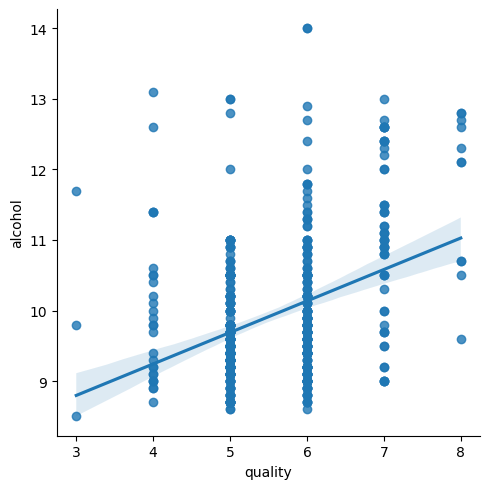

In [19]:
sn.lmplot(x='quality', y='alcohol', data=vin)

In [20]:
# Analyse Factorielle
## Installer "PCA"
## Nous avons choisit l'ACP car nous avons un contenue continue et numerique
from sklearn.decomposition import PCA

In [47]:
import numpy as np

variables = vin[['fixed acidity', 'volatile acidity', 'citric acid',
             'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
             ]]
variables = n.array(variables)

pca = PCA(n_components=2)
pca.fit(variables)

transformed = pca.transform(variables)
transformed_arr = np.array(transformed)

print(transformed)

[[-76.21490614  -1.6432696 ]
 [-40.8223144   -7.19596552]
 [-55.84802582  -0.6641577 ]
 ...
 [ 60.35596241   9.43031089]
 [ 89.29709666 -33.21337097]
 [ 45.80900611 -27.18912574]]


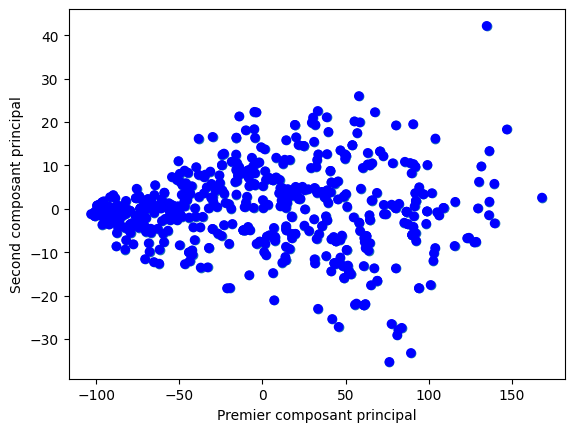

In [22]:
# Representation graphique
m.scatter(transformed[:,0], transformed[:,1])
m.xlabel("Premier composant principal")
m.ylabel("Second composant principal")

# colors = ['r' if x > 0 else 'y' for x in variables[:, 0]]
colours = ['b' if y > 0 else 'r' for y in variables[:, 1]
          ]


m.scatter(transformed[:,0], transformed[:,1], c=colours)

m.show()


In [23]:
## Valeurs propres
pca.explained_variance_

array([3939.13367275,   87.80639875])

In [44]:
## Pourcentage de variance expliquer
pourcentage_variance = pca.explained_variance_ratio_
pourcentage_variance

array([0.97426645, 0.02171717])

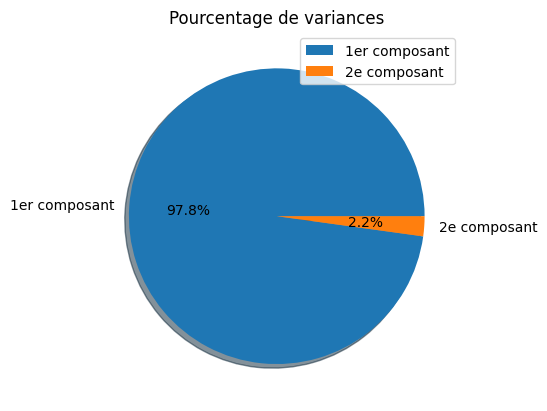

In [45]:
lab = ['1er composant','2e composant']

# Récupérer les colonnes dans des listes
labels = lab
sizes =  pourcentage_variance

# Afficher le diagramme
m.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

# Personnaliser l'apparence
m.title('Pourcentage de variances')
m.legend(labels, loc='best')

# Afficher le diagramme
m.show()


# INTERPRETATION DU POURCENTAGE DE VARIANCE
Dans notre cas, ayant obtenu un pourcentage de variance de 97% pour la première composante principale et 0.02% pour la deuxième composante principale, cela signifie que la première composante principale capture une grande partie de la variance dans nos données, tandis que la deuxième composante principale capture une petite quantité de variance supplémentaire.

In [25]:
## Coeffecient de chaque variable
comp = pca.components_
comp

array([[-5.85251165e-03, -1.71530203e-03,  9.80068718e-04,
         4.68862989e-02, -2.13283112e-04,  2.41010123e-01,
         9.69365519e-01, -1.14310724e-06, -1.04983542e-03,
        -8.03954807e-04, -2.51758014e-03],
       [ 1.89622258e-03,  2.20835889e-03, -8.32595240e-04,
        -5.85596413e-02, -4.85961821e-04, -9.68084907e-01,
         2.43560204e-01, -2.01834215e-05,  4.37069225e-04,
         1.91090391e-03,  6.89665296e-03]])

In [27]:
coef_corr = n.corrcoef(variables, rowvar=False)
coef_corr

array([[ 1.        ,  0.12825895,  0.26789034, -0.14850518,  0.23284989,
        -0.2845461 , -0.3207559 ,  0.42354067, -0.28945588,  0.34138037,
        -0.14231597],
       [ 0.12825895,  1.        , -0.52878328, -0.36437632,  0.298849  ,
        -0.51740982, -0.53701509,  0.23469867,  0.3295069 ,  0.25349073,
        -0.07695315],
       [ 0.26789034, -0.52878328,  1.        ,  0.28073091,  0.06677019,
         0.33858509,  0.36573586,  0.0582082 , -0.45000026,  0.06850487,
        -0.01269287],
       [-0.14850518, -0.36437632,  0.28073091,  1.        , -0.2300466 ,
         0.57500365,  0.60881101,  0.47117681, -0.39494995, -0.24605899,
        -0.35437913],
       [ 0.23284989,  0.298849  ,  0.06677019, -0.2300466 ,  1.        ,
        -0.16723198, -0.25006215,  0.25637134, -0.12370689,  0.59316077,
        -0.20057174],
       [-0.2845461 , -0.51740982,  0.33858509,  0.57500365, -0.16723198,
         1.        ,  0.83765749,  0.0057018 , -0.35494295, -0.24568516,
        -0.166

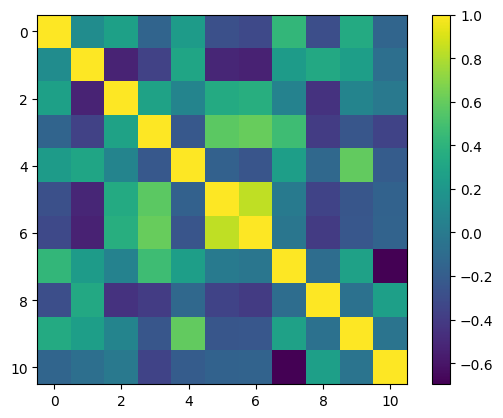

In [28]:
# Representation graphique des valeurs du coefficient de covariance
m.imshow(coef_corr, cmap='viridis')
m.colorbar()
m.show()

In [28]:
# Interpretation

- Les valeurs diagonales de la matrice (coefficients de corrélation de 1) représentent la corrélation parfaite entre une variable et elle-même.
- Les coefficients de corrélation entre -0.1 et 0.1 sont considérés comme une corrélation très faible ou négligeable.
- Les coefficients de corrélation positifs proches de 1 indiquent une corrélation positive forte entre les variables correspondantes. Par exemple, la première variable est fortement positivement corrélée avec les neuvième (0.42354067) et dixième (0.34138037) variables.
- Les coefficients de corrélation négatifs proches de -1 indiquent une corrélation négative forte entre les variables correspondantes. Par exemple, la quatrième variable est fortement négativement corrélée avec la huitième variable (-0.69683678).
- Les coefficients de corrélation proches de zéro indiquent une faible corrélation ou l'absence de corrélation linéaire entre les variables correspondantes. Par exemple, les deuxième et troisième variables ont une corrélation faible (-0.52878328).

Il est important de noter que cette interprétation se base uniquement sur les valeurs de corrélation et ne prend pas en compte d'autres facteurs tels que la significativité statistique ou la causalité entre les variables.


In [41]:
# Classification Avec K-means
## 1ere Methode

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10)
labels = kmeans.fit_predict(transformed)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 

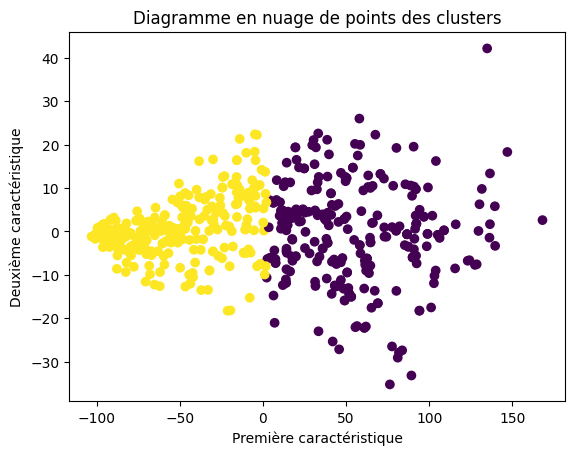

In [43]:
m.scatter(transformed[:, 0], transformed[:, 1], c=labels)
m.xlabel('Première caractéristique')
m.ylabel('Deuxième caractéristique')
m.title('Diagramme en nuage de points des clusters')
m.show()

In [ ]:
# Interpretation

Le résultat de la classification avec l'algorithme k-means montre deux groupes distincts dans votre jeu de données de qualité de vin. Les échantillons sont étiquetés comme appartenant à la classe 0 ou à la classe 1.
Cela suggère qu'il existe une différence significative entre les échantillons de vin dans ces deux classes. Il est possible que les échantillons de la classe 0 représentent des vins de qualité inférieure, tandis que ceux de la classe 1 représentent des vins de qualité supérieure.
La classification basée sur les caractéristiques initiales des échantillons de vin a permis de les regrouper en fonction de leurs similitudes. L'algorithme k-means a cherché à minimiser la distance entre les échantillons à l'intérieur de chaque groupe (intra-cluster) et à maximiser la distance entre les groupes (inter-cluster).

In [51]:
# Classification avec une methode d'analyse factorielle

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [73]:
from re import X
# Séparer les fonctionnalités (X) des labels (y)
X_train = vin.iloc[:, 1:-1]  # Sélectionner toutes les colonnes sauf la dernière et la premiere
y_train = vin.iloc[:, -1]   # Sélectionner la dernière colonne

# Créer et entraîner le modèle AFD
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Données de test
X_test = [[7.4,	0.70,	0.00,	1.9,	0.076,	11.0,	34.0,	0.9978,	3.51,	0.56,	9.4]	]

# Prédire les classes des données de test
y_pred = model.predict(X_test)

print(y_pred)

[5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [74]:
# classification HAC
#  2eme methode

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
# Créer le modèle HAC
model = AgglomerativeClustering(n_clusters=2)

# Effectuer la classification HAC
labels_hac = model.fit_predict(variables)

print(labels_hac)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 

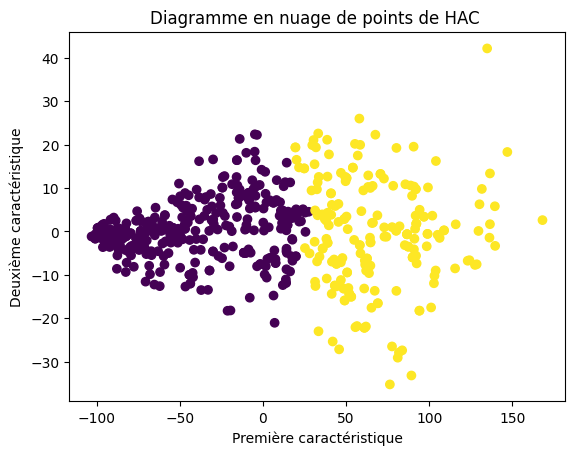

In [84]:
m.scatter(transformed[:, 0], transformed[:, 1], c=labels_hac)
m.xlabel('Première caractéristique')
m.ylabel('Deuxième caractéristique')
m.title('Diagramme en nuage de points de HAC ')
m.show()

# Interpretation

La liste est composée de 0 et de 1. Chaque valeur correspond à l'appartenance d'un échantillon (ou d'une instance) à un cluster particulier.
La valeur 0 indique que l'échantillon n'appartient pas à un cluster spécifique ou qu'il a été attribué à un cluster "non significatif".
La valeur 1 indique que l'échantillon appartient à un cluster spécifique.
Par exemple, le premier échantillon de votre dataset a une valeur de 0, ce qui signifie qu'il n'a pas été attribué à un cluster particulier. Les échantillons 15, 16, 61, 64, etc. ont une valeur de 1, ce qui signifie qu'ils appartiennent à un cluster spécifique.
